In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os, cv2

### to change according to your machine
base_dir = os.path.expanduser("/home/data/lcz")
path_validation = os.path.join(base_dir, 'validation.h5')
fid_validation = h5py.File(path_validation,'r')

## we can have a look at which keys are stored in the file
## you will get the return [u'label', u'sen1', u'sen2']
## sen1 and sen2 means the satellite images
print (fid_validation.keys())
print ("-" * 60)
print ("validation part")
s1_validation = fid_validation['sen1']
print (s1_validation.shape)
s2_validation = fid_validation['sen2']
print (s2_validation.shape)
label_validation = fid_validation['label']
print (label_validation.shape)

KeysView(<HDF5 file "validation.h5" (mode r)>)
------------------------------------------------------------
validation part
(24119, 32, 32, 8)
(24119, 32, 32, 10)
(24119, 17)


202.0


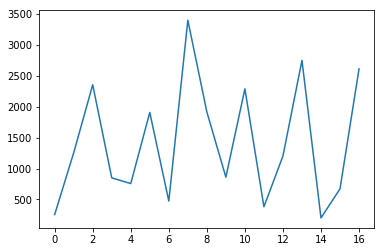

In [2]:
## compute the quantity for each col
# visualization, plot the first pair of Sentinel-1 and Sentinel-2 patches of training.h5
import matplotlib.pyplot as plt
label_qty = np.sum(label_validation, axis=0)
print(min(label_qty))
plt.plot(label_qty)

In [3]:
s1=[]
s2=[]
for i in range(17):
    idx=np.where(label_validation[:,i])[0][:202]
    s1.append(s1_validation[list(idx)])
    s2.append(s2_validation[list(idx)])
s1=np.concatenate(s1)
s2=np.concatenate(s2)
print(s1.shape,s2.shape)

(3434, 32, 32, 8) (3434, 32, 32, 10)


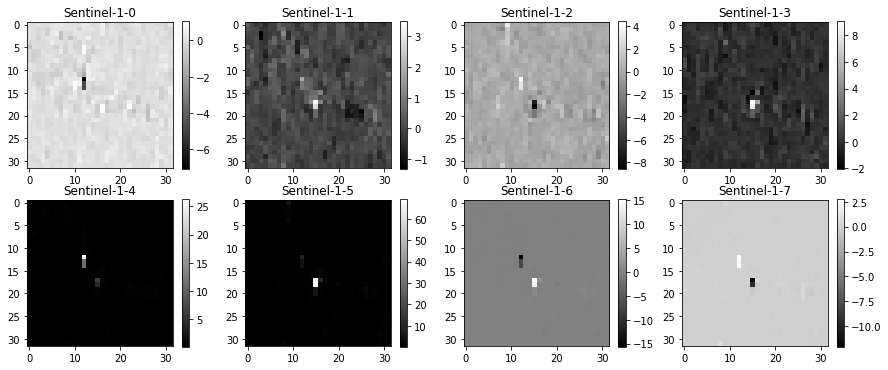

In [4]:
plt.subplots(figsize=(15, 6))

for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(s1[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

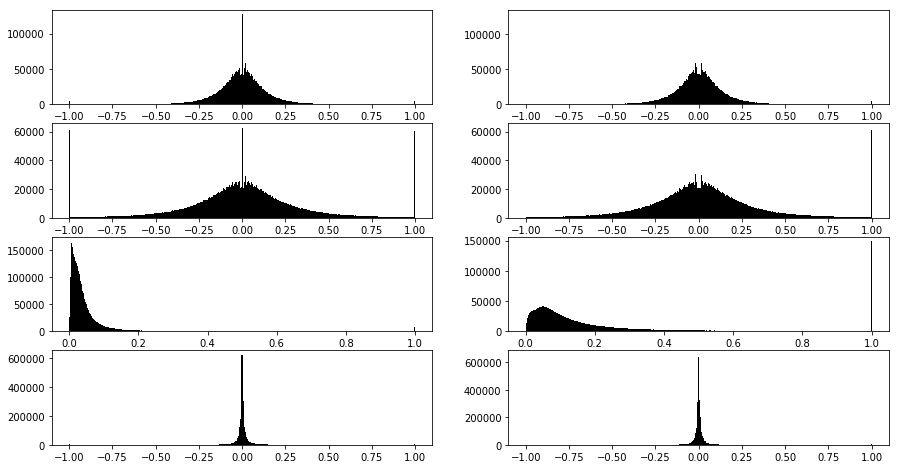

In [5]:
s1_=np.where(s1>1,1,s1)
s1_=np.where(s1_<-1,-1,s1_)
plt.subplots(figsize=(15,8))
for i in range(8):
    plt.subplot(4,2,i+1)
    s1_n=s1_[:,:,:,i].reshape([-1])
    plt.hist(s1_n, bins=500, color='k')
plt.show()

-5.9067401787125045 3.0378040676317535
-3.8306527401462893 2.602197409580565
-3.134431938880929 3.6640645834076753


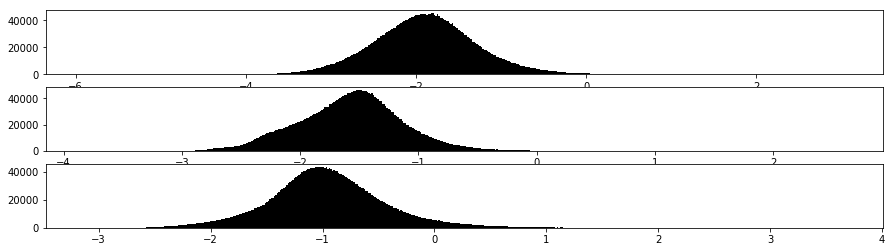

In [8]:
s1_=np.zeros([3434,32,32,3])
s1_[:,:,:,0]=0.5*np.log10(np.power(s1[:,:,:,6],2)+np.power(s1[:,:,:,7],2))
s1_[:,:,:,1]=np.log10(s1[:,:,:,4])
s1_[:,:,:,2]=np.log10(s1[:,:,:,5])
plt.subplots(figsize=(15,4))
for i in range(3):
    plt.subplot(3,1,i+1)
    s1_n=s1_[:,:,:,i].reshape([-1])
    print(np.min(s1_n),np.max(s1_n))
    plt.hist(s1_n, bins=500, color='k')
plt.show()

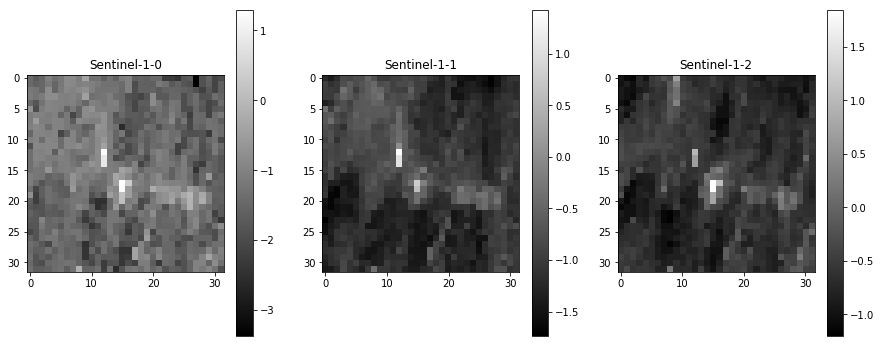

In [9]:
plt.subplots(figsize=(15, 6))

for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(s1_[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

-1.0 1.0
-0.9322610960585157 1.0
-1.0 1.0


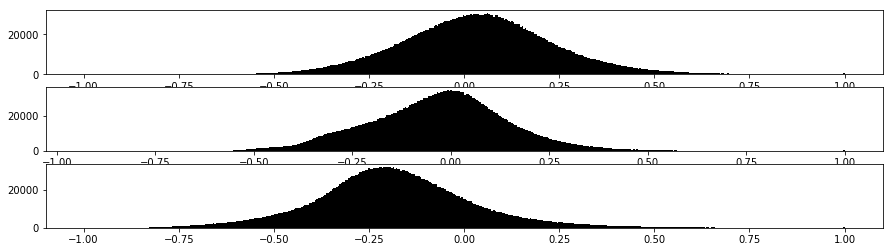

In [33]:
s1_band=np.zeros_like(s1_)
s1_band[:,:,:,0]=np.where(s1_[:,:,:,0]>1,1,s1_[:,:,:,0])
s1_band[:,:,:,0]=(np.where(s1_band[:,:,:,0]<-5,-5,s1_band[:,:,:,0])+2)/3
s1_band[:,:,:,1]=np.where(s1_[:,:,:,1]>1,1,s1_[:,:,:,1])
s1_band[:,:,:,1]=(np.where(s1_band[:,:,:,1]<-4,-4,s1_band[:,:,:,1])+1.5)/2.5
s1_band[:,:,:,2]=np.where(s1_[:,:,:,2]>2,2,s1_[:,:,:,2])
s1_band[:,:,:,2]=(np.where(s1_band[:,:,:,2]<-3,-3,s1_band[:,:,:,2])+0.5)/2.5
plt.subplots(figsize=(15,4))
for i in range(3):
    plt.subplot(3,1,i+1)
    s1_n=s1_band[:,:,:,i].reshape([-1])
    print(np.min(s1_n),np.max(s1_n))
    plt.hist(s1_n, bins=500, color='k')
plt.show()

-6.588819565837 8.072906092793906
-4.9832459434867635 9.21328850376475
-4.154150523272464 8.824730611242678


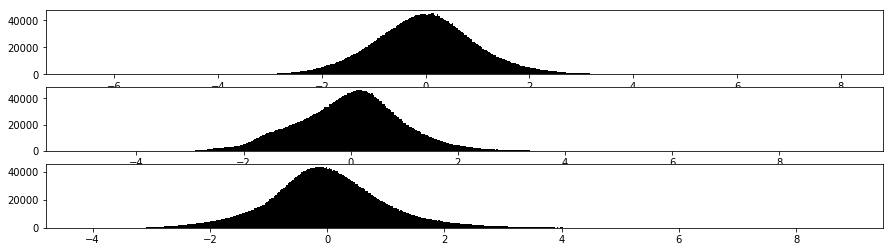

In [21]:
s1_z=np.zeros_like(s1_)
plt.subplots(figsize=(15,4))
for i in range(3):
    plt.subplot(3,1,i+1)
    mean = np.mean(s1_[:,:,:,i])
    std = np.std(s1_[:,:,:,i])
    s1_z[:,:,:,i]=(s1_[:,:,:,i]-mean)/std
    print(np.min(s1_z[:,:,:,i]),np.max(s1_z[:,:,:,i]))
    plt.hist(s1_z[:,:,:,i].reshape([-1]), bins=500, color='k')
plt.show()

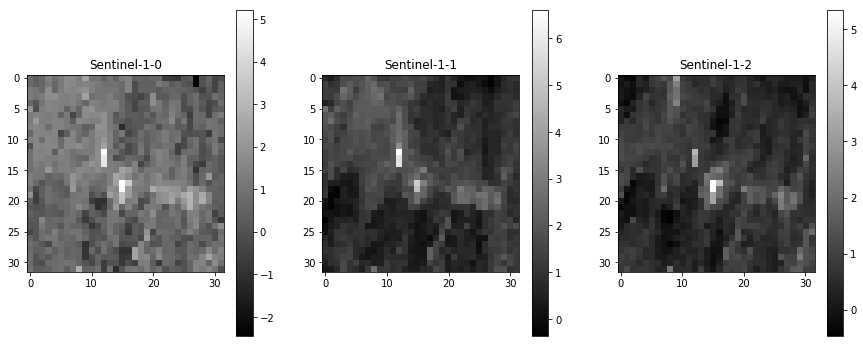

In [22]:
plt.subplots(figsize=(15, 6))

for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(s1_z[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

-3.773693607152546 6.905059010665411
-3.3292910361546606 8.22094528937237
-3.5603031857017946 7.459101812677138


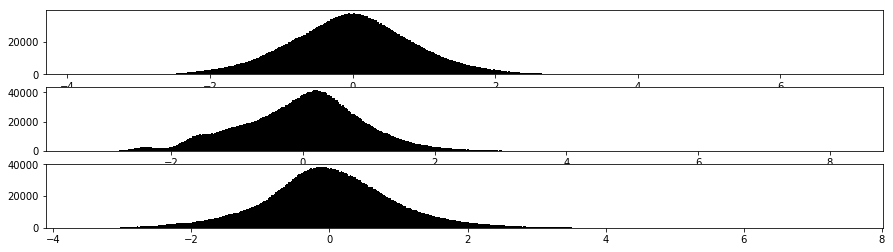

In [26]:
s1_blur=np.zeros_like(s1_)
for i in range(3434):
    for j in range(3):
        s1_blur[i,:,:,j]=cv2.blur(s1_z[i,:,:,j],(3,3))
        #s1_blur[i,:,:,j]=cv2.GaussianBlur(s1_z[i,:,:,j],(3,3),0)
plt.subplots(figsize=(15,4))
for i in range(3):
    plt.subplot(3,1,i+1)
    s1_n=s1_blur[:,:,:,i].reshape([-1])
    print(np.min(s1_n),np.max(s1_n))
    plt.hist(s1_n, bins=500, color='k')
plt.show()

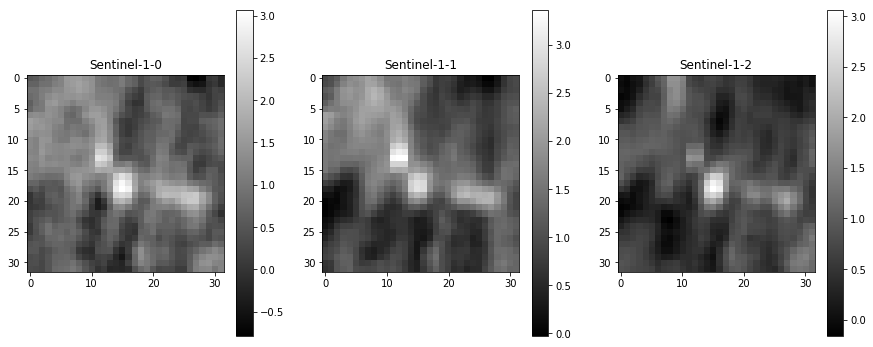

In [27]:
plt.subplots(figsize=(15, 6))

for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(s1_blur[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

-0.8385985793672325 1.0
-0.7398424524788134 1.0
-0.79117848571151 1.0


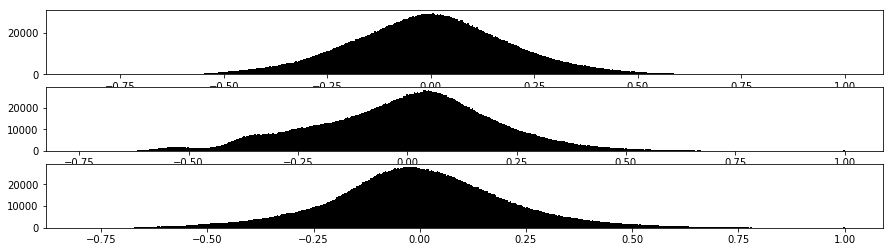

In [34]:
th=4.5
s1_1=np.zeros_like(s1_)
s1_1[:,:,:,0]=np.where(s1_blur[:,:,:,0]>th,th,s1_blur[:,:,:,0])
s1_1[:,:,:,0]=(np.where(s1_1[:,:,:,0]<-th,-th,s1_1[:,:,:,0]))/th
s1_1[:,:,:,1]=np.where(s1_blur[:,:,:,1]>th,th,s1_blur[:,:,:,1])
s1_1[:,:,:,1]=(np.where(s1_1[:,:,:,1]<-th,-th,s1_1[:,:,:,1]))/th
s1_1[:,:,:,2]=np.where(s1_blur[:,:,:,2]>th,th,s1_blur[:,:,:,2])
s1_1[:,:,:,2]=(np.where(s1_1[:,:,:,2]<-th,-th,s1_1[:,:,:,2]))/th
plt.subplots(figsize=(15,4))
for i in range(3):
    plt.subplot(3,1,i+1)
    s1_n=s1_1[:,:,:,i].reshape([-1])
    print(np.min(s1_n),np.max(s1_n))
    plt.hist(s1_n, bins=500, color='k')
plt.show()

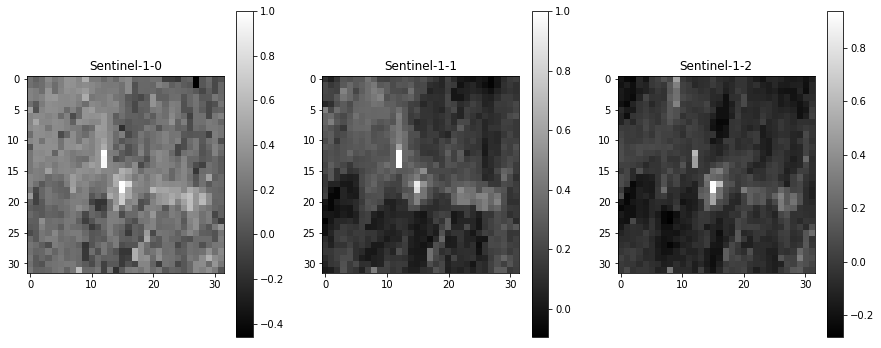

In [36]:
plt.subplots(figsize=(15, 6))

for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(s1_band[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

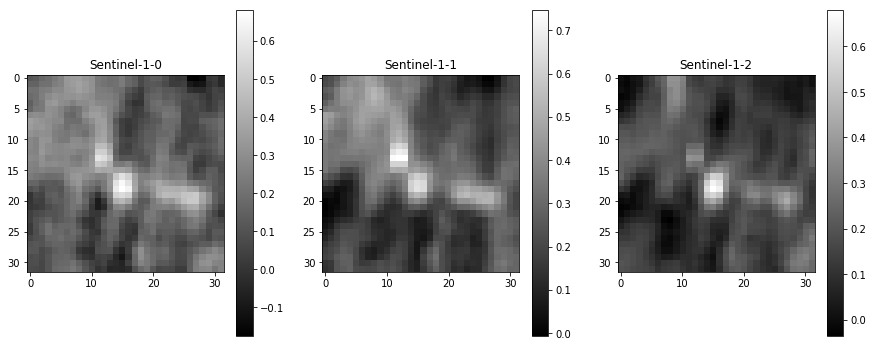

In [35]:
plt.subplots(figsize=(15, 6))

for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(s1_1[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

## s2

0.0001 2.7457
0.0001 2.8
0.0001 2.8
0.0001 2.4563
0.0001 1.8773
0.0001 2.2039
0.0103 2.8
0.0001 2.5546
0.001 1.9599
0.0001 2.02


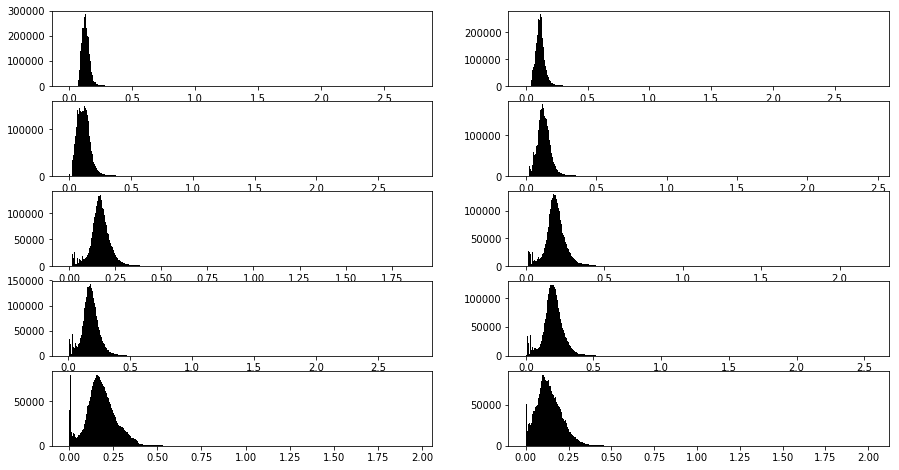

In [53]:
plt.subplots(figsize=(15,8))
for i in range(10):
    plt.subplot(5,2,i+1)
    s2_n=s2[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.show()

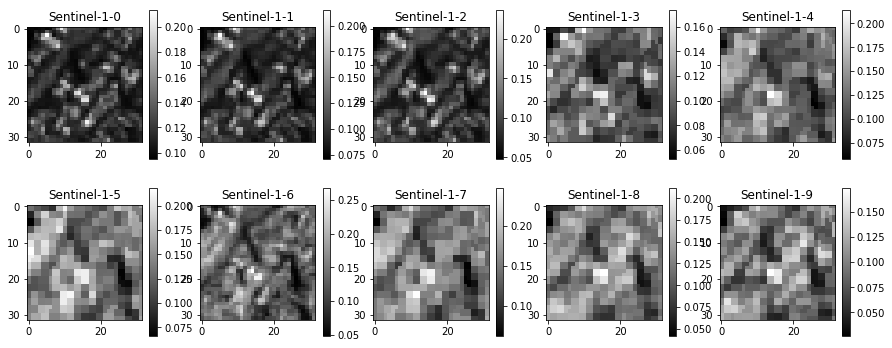

In [38]:
plt.subplots(figsize=(15, 6))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(s2[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

-4.0 0.4386530837157114
-4.0 0.4471580313422192
-4.0 0.4471580313422192
-4.0 0.390281408229663
-4.0 0.2735336801512977
-4.0 0.3431918849014073
-1.9871627752948278 0.4471580313422192
-4.0 0.40732290783963865
-3.0 0.292233912909475
-4.0 0.3053513694466238


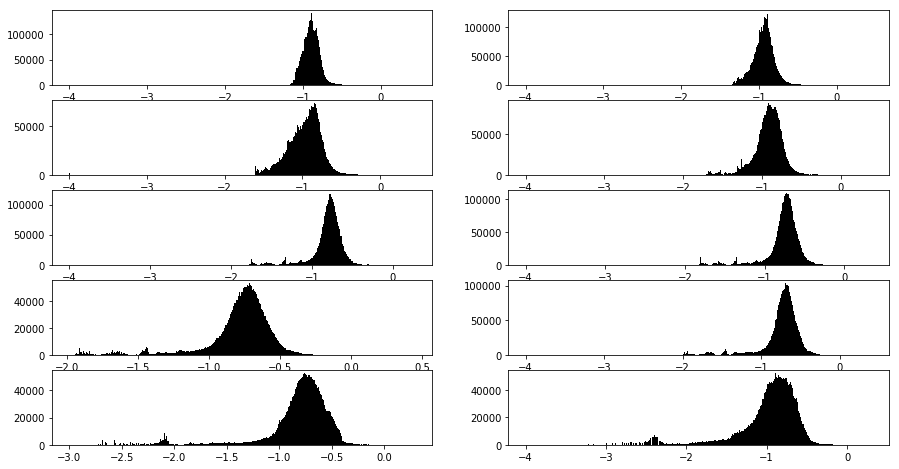

In [39]:
s2_=np.log10(s2)
plt.subplots(figsize=(15,8))
for i in range(10):
    plt.subplot(5,2,i+1)
    s2_n=s2_[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.show()

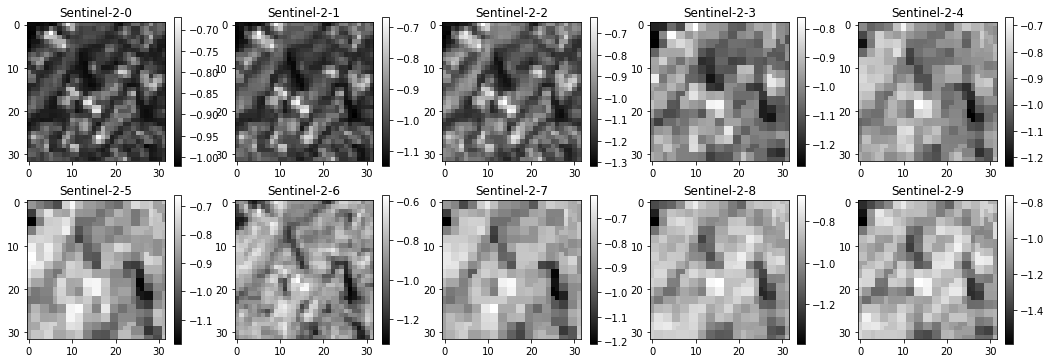

In [40]:
plt.subplots(figsize=(18, 6))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(s2_[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

In [51]:
s2_=np.concatenate([s2_[:,:,:,0:3],np.expand_dims(s2_[:,:,:,6],-1)], -1)

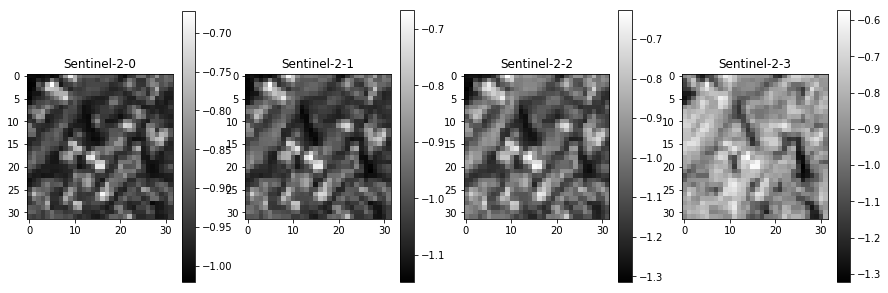

In [52]:
plt.subplots(figsize=(15, 5))

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(s2_[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

-29.84267843019798 12.798577613483593
-21.687108167495634 9.861417441469584
-13.425881251907828 6.319486255390812
-5.063476411313381 5.220938485344333


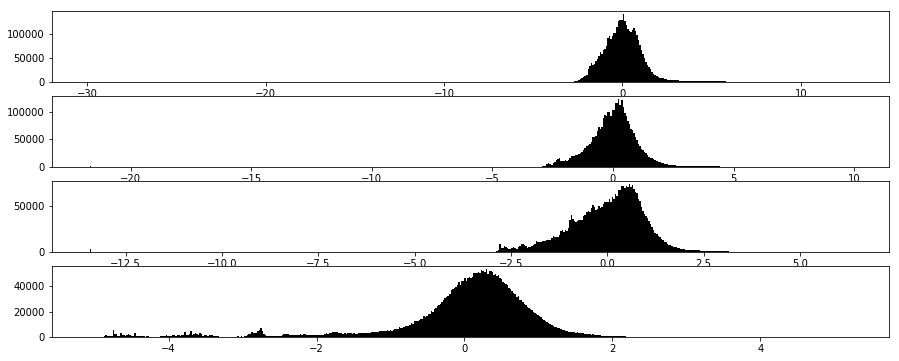

In [71]:
s2_z=np.zeros_like(s2_)
plt.subplots(figsize=(15,6))
for i in range(4):
    plt.subplot(4,1,i+1)
    mean = np.mean(s2_[:,:,:,i])
    std = np.std(s2_[:,:,:,i])
    s2_z[:,:,:,i]=(s2_[:,:,:,i]-mean)/std
    print(np.min(s2_z[:,:,:,i]),np.max(s2_z[:,:,:,i]))
    plt.hist(s2_z[:,:,:,i].reshape([-1]), bins=500, color='k')
plt.show()

-5.815923040906209 8.905656965368316
-21.687108167495634 7.218350859006172
-13.425881251907828 5.242296899539834
-4.941648173410092 4.48081202962997


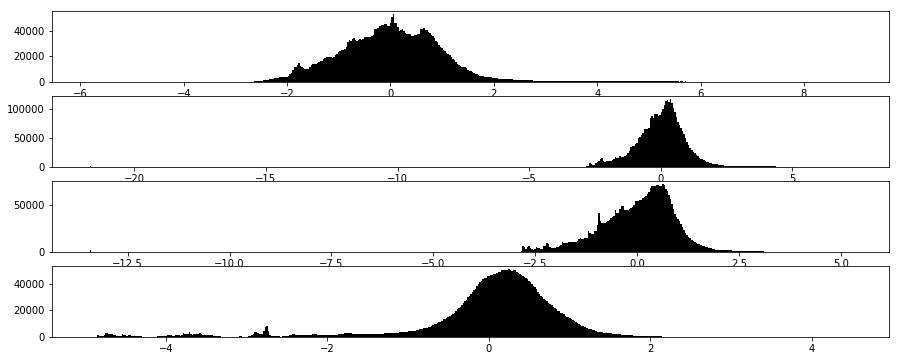

In [70]:
s2_blur=np.zeros_like(s2_)
for i in range(3434):
    for j in range(4):
        #s2_blur[i,:,:,j]=cv2.blur(s2_z[i,:,:,j],(3,3))
        s2_blur[i,:,:,j]=cv2.GaussianBlur(s2_z[i,:,:,j],(3,3),0)
plt.subplots(figsize=(15,6))
for i in range(4):
    plt.subplot(4,1,i+1)
    s2_n=s2_blur[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.show()

-1.0 1.0
-1.0 1.0
-1.0 1.0
-1.0 1.0


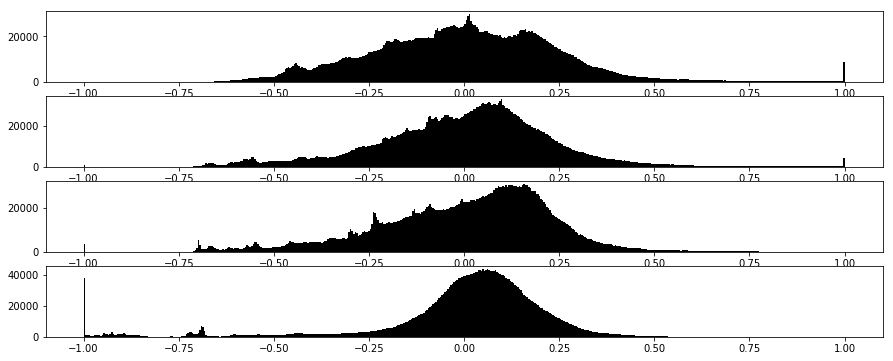

In [72]:
th_2=4
s2_0=np.zeros_like(s2_)
s2_0[:,:,:,0]=np.where(s2_blur[:,:,:,0]<-th_2,-th_2,s2_blur[:,:,:,0])
s2_0[:,:,:,0]=np.where(s2_0[:,:,:,0]>th_2,th_2,s2_0[:,:,:,0])/th_2
s2_0[:,:,:,1]=np.where(s2_blur[:,:,:,1]<-th_2,-th_2,s2_blur[:,:,:,1])
s2_0[:,:,:,1]=np.where(s2_0[:,:,:,1]>th_2,th_2,s2_0[:,:,:,1])/th_2
s2_0[:,:,:,2]=np.where(s2_blur[:,:,:,2]<-th_2,-th_2,s2_blur[:,:,:,2])
s2_0[:,:,:,2]=np.where(s2_0[:,:,:,2]>th_2,th_2,s2_0[:,:,:,2])/th_2
s2_0[:,:,:,3]=np.where(s2_blur[:,:,:,3]<-th_2,-th_2,s2_blur[:,:,:,3])
s2_0[:,:,:,3]=np.where(s2_0[:,:,:,3]>th_2,th_2,s2_0[:,:,:,3])/th_2
plt.subplots(figsize=(15,6))
for i in range(4):
    plt.subplot(4,1,i+1)
    s2_n=s2_0[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.show()

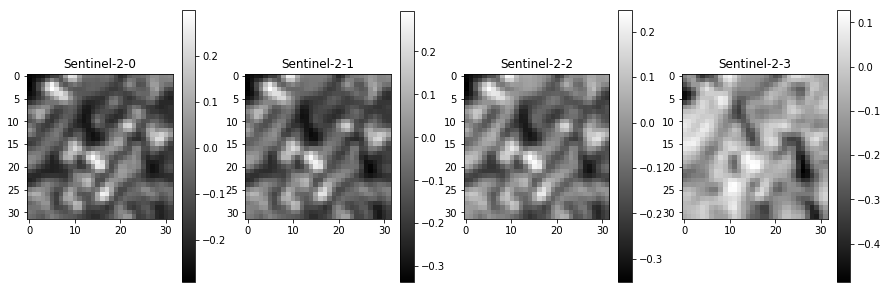

In [73]:
plt.subplots(figsize=(15, 5))

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(s2_0[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()